In [61]:
#Distributed under the MIT License.
#See LICENSE.txt for details.

%matplotlib inline
import numpy as np
import pylab as pl
import h5py

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 7, 7
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20
pl.rcParams['font.sans-serif'] = 'serif'
pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'large'

pl.rcParams['xtick.major.size'] = 8
pl.rcParams['xtick.minor.size'] = 4
pl.rcParams['xtick.major.pad']  = 8
pl.rcParams['xtick.minor.pad']  = 8
pl.rcParams['xtick.color']      = 'k'
pl.rcParams['xtick.labelsize']  = 'large'
pl.rcParams['xtick.direction']  = 'in'

pl.rcParams['ytick.major.size'] = 8
pl.rcParams['ytick.minor.size'] = 4
pl.rcParams['ytick.major.pad']  = 8
pl.rcParams['ytick.minor.pad']  = 8
pl.rcParams['ytick.color']      = 'k'
pl.rcParams['ytick.labelsize']  = 'large'
pl.rcParams['ytick.direction']  = 'in'

In [68]:
#pass in TimestepNumber and return ObservationId
def TimestepToObsID(VolumeData, TimestepNumber):
    #make a dictionary where first element is sorted time, 
    #second is ObservationID
    TimeDict = {}

    for obs in sorted(VolumeData):
        TimeDict[VolumeData[obs].attrs['observation_value']] = obs
    
    SortedTimeDict = dict(sorted(TimeDict.items()))

    ObsID = SortedTimeDict[list(SortedTimeDict)[TimestepNumber]]
    
    print('ObsID =', ObsID, ', ', 't =', VolumeData[ObsID].attrs['observation_value'])
    
    return ObsID

#pass in TimestepNumber and plot arr(x)
def PlotTimestep(VolumeData, arrID, TimestepNumber, 
                 StyleString, ShowPlot=True, SqrtArr=False, 
                 XLabel='$x$', YLabel='$y$', LineLabel=''):
    ObsID = TimestepToObsID(VolumeData, TimestepNumber)
    x     = VolumeData[ObsID]['InertialCoordinates_x'][:]
    arr   = VolumeData[ObsID][arrID][:]
    
    #package (x, arr) into a list of tuples, sort by x, split
    #back into separate data arrays
    DataTuple = sorted(zip(x, arr))
    x   = np.array([])
    arr = np.array([])
    for element in DataTuple:
        x = np.append(x, element[0])
        arr = np.append(arr, element[1])
    
    if(SqrtArr):
        arr = np.sqrt(arr)
    
    pl.plot(x, arr, StyleString, label=LineLabel)
    pl.xlabel(XLabel)
    pl.ylabel(YLabel)
    
    if(ShowPlot):
        pl.legend()
        pl.show()
    
    return 0

ObsID = ObservationId508773018431068571 ,  t = 4.716994065778296
ObsID = ObservationId13485286469246494171 ,  t = 4.6863298507792726


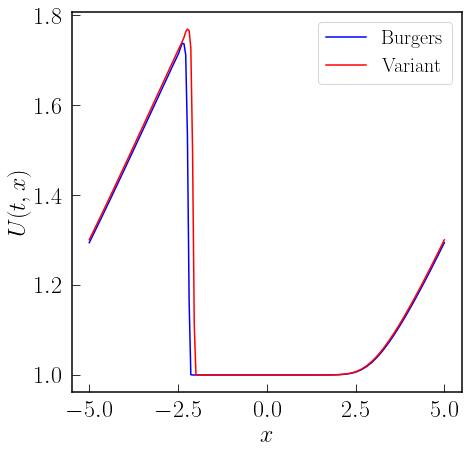

0

In [82]:
#get data dictionary
fB = h5py.File('BurgersStepVolume0.h5')['VolumeData.vol']
fV = h5py.File('BurgersVariantStepVolume0.h5')['VolumeData.vol']

PlotTimestep(fB, 'U', 50, 'b-', ShowPlot=False, SqrtArr=False, LineLabel='Burgers', YLabel='$U(t,x)$')
PlotTimestep(fV, 'V', 50, 'r-', ShowPlot=True, SqrtArr=True, LineLabel='Variant', YLabel='$U(t,x)$')